https://www.kaggle.com/competitions/titanic/data

In [1]:
# Import necessary Libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read Data
df = pd.read_csv(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Machine-Learning-from-Scratch\titanic_dataset\train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
(df.isnull().sum()*100)/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
df[['Age', 'Survived']].head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [6]:
df[['Age', 'Survived']].isnull().sum()

Age         177
Survived      0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\sarvesh.kesharwani\AppData\Local\Temp\ipykernel_29264\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [8]:
df[['Age', 'Survived']].isnull().sum()

Age         0
Survived    0
dtype: int64

In [9]:
x = df['Age'].values
y = df['Survived'].values

In [10]:
# mean
def get_mean(arr):
    return np.sum(arr)/len(arr)

# variance
def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

In [11]:
# find coeff
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean*m
    return m, c

# Regression Function
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + c
        prediction.append(y)

    r2 = r2_score(prediction, y_test)
    mse = mean_squared_error(prediction, y_test)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction

# There are 100 sample out of which 80 are for training and 20 are for testing
linear_regression(x[:80], y[:80], x[80:], y[80:])


The R2 score of the model is:  -38301.507976599765
The MSE score of the model is:  0.23783065109188026


[np.float64(0.4240059324808537),
 np.float64(0.42535508409089623),
 np.float64(0.42548982919077316),
 np.float64(0.4251623481466044),
 np.float64(0.42304225275939483),
 np.float64(0.42612602786806336),
 np.float64(0.422849516815103),
 np.float64(0.42548982919077316),
 np.float64(0.42419866842514553),
 np.float64(0.4243914043694373),
 np.float64(0.42535508409089623),
 np.float64(0.42362046059227015),
 np.float64(0.42863159514385657),
 np.float64(0.42477687625802085),
 np.float64(0.4311371624196497),
 np.float64(0.42548982919077316),
 np.float64(0.4334499937511511),
 np.float64(0.42419866842514553),
 np.float64(0.4263187638123551),
 np.float64(0.4263187638123551),
 np.float64(0.4251623481466044),
 np.float64(0.42548982919077316),
 np.float64(0.42381319653656196),
 np.float64(0.42612602786806336),
 np.float64(0.4268969716452305),
 np.float64(0.4251623481466044),
 np.float64(0.42381319653656196),
 np.float64(0.42548982919077316),
 np.float64(0.42708970758952225),
 np.float64(0.425489829190

In [12]:
from matplotlib import colors
from matplotlib.colors import rgb_to_hsv

In [20]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S


In [ ]:
df1 = df.drop(columns=['PassengerId', 'Name', 'Sex'])

In [24]:
df['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded_sex = ohe.fit_transform(df[['Sex']])
df['Sex'] = pd.DataFrame()

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['csr_matrix']

In [36]:
df['Sex']

0        (np.int32(0), np.int32(1))\t1.0
1        (np.int32(0), np.int32(0))\t1.0
2        (np.int32(0), np.int32(0))\t1.0
3        (np.int32(0), np.int32(0))\t1.0
4        (np.int32(0), np.int32(1))\t1.0
                     ...                
886      (np.int32(0), np.int32(1))\t1.0
887      (np.int32(0), np.int32(0))\t1.0
888      (np.int32(0), np.int32(0))\t1.0
889      (np.int32(0), np.int32(1))\t1.0
890      (np.int32(0), np.int32(1))\t1.0
Name: Sex, Length: 891, dtype: object

In [21]:
df[['Fare', 'Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


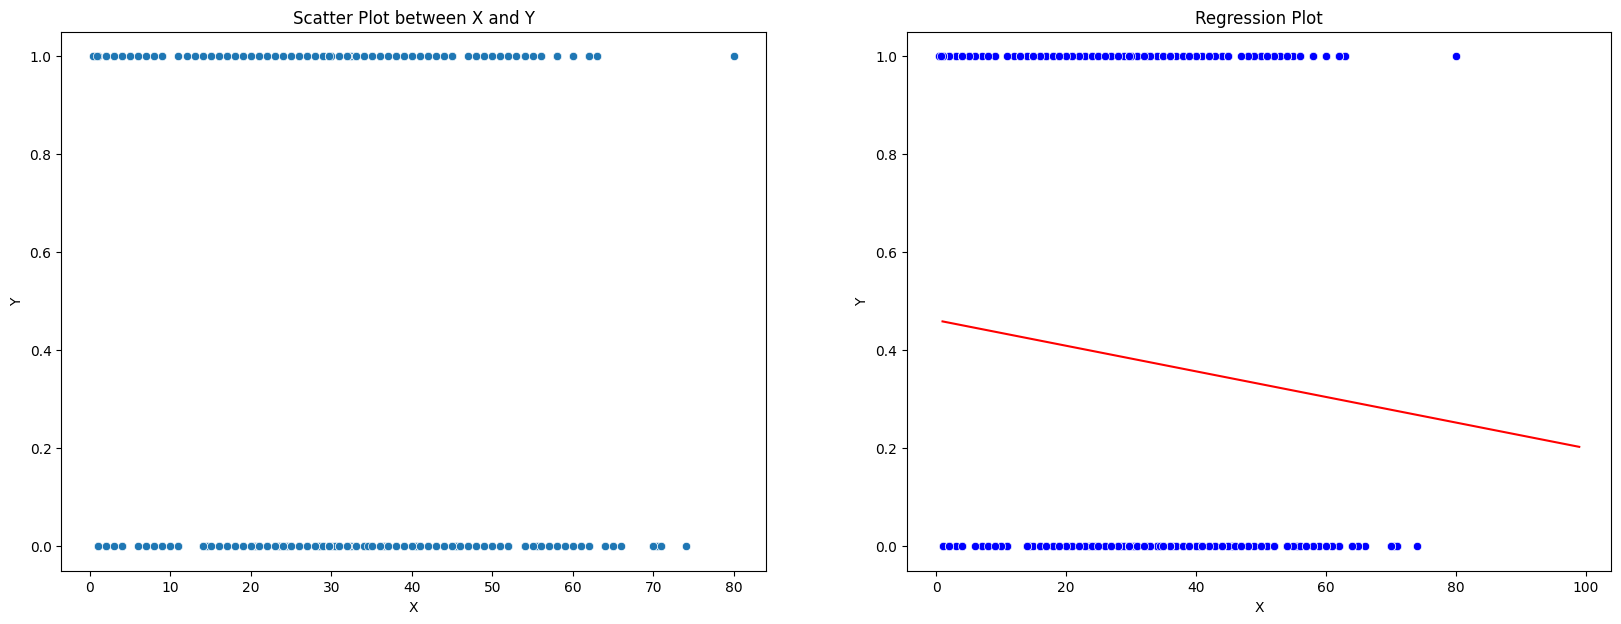

In [14]:
# Visualize
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in range(1,100):
        yhat = m*x0 + c
        prediction.append(yhat)

    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')

    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, c='blue')
    sns.lineplot(x = [i for i in range(1, 100)], y = prediction, c='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()

plot_reg_line(x, y)